In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [2]:
classification_data = pd.read_csv("project_2_train.csv")

In [3]:
classification_data = classification_data.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'O' else col.fillna(col.mean()), axis=0)


In [4]:
X_classification = classification_data.iloc[:, 1:]  
y_classification = classification_data.iloc[:, 0]   

In [5]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

In [6]:
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)
log_reg_pred = log_reg.predict(X_test_clf_scaled)
log_reg_score = accuracy_score(y_test_clf, log_reg_pred)

In [8]:
rfc_model = RandomForestClassifier().fit(X_train_clf_scaled,y_train_clf)
rfc_pred = rfc_model.predict(X_test_clf_scaled)
rfc_score = accuracy_score(rfc_pred,y_test_clf)

In [9]:
sgd_model = SGDClassifier(random_state=42, max_iter=100)
sgd_model.fit(X_train_clf_scaled, y_train_clf)
sgd_pred = sgd_model.predict(X_test_clf_scaled)
sgd_score = accuracy_score(sgd_pred, y_test_clf)

c:\Users\brhnd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
y_train_clf_encoded = to_categorical(y_train_clf)
y_test_clf_encoded = to_categorical(y_test_clf)

In [11]:
X_train_clf_cnn = np.expand_dims(X_train_clf_scaled, axis=2)
X_test_clf_cnn = np.expand_dims(X_test_clf_scaled, axis=2)

In [12]:
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_clf_scaled.shape[1],)),
    Dropout(0.3),  # Overfitting'i önlemek için Dropout
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_clf_encoded.shape[1], activation='softmax')  # Çıkış katmanı
])


c:\Users\brhnd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
dnn_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [14]:
dnn_history = dnn_model.fit(X_train_clf_scaled, y_train_clf_encoded, 
                            validation_split=0.2, 
                            epochs=50, 
                            batch_size=32, 
                            verbose=1)

Epoch 1/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4691 - loss: 1.8619 - val_accuracy: 0.7714 - val_loss: 0.7814
Epoch 2/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6770 - loss: 1.0481 - val_accuracy: 0.7993 - val_loss: 0.6519
Epoch 3/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7110 - loss: 0.9367 - val_accuracy: 0.8195 - val_loss: 0.5995
Epoch 4/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7319 - loss: 0.8736 - val_accuracy: 0.8276 - val_loss: 0.5583
Epoch 5/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7427 - loss: 0.8160 - val_accuracy: 0.8318 - val_loss: 0.5452
Epoch 6/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7605 - loss: 0.7698 - val_accuracy: 0.8419 - val_loss: 0.5184
Epoch 7/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7641 - loss: 0.7566 - val_accuracy: 0.8411 - val_loss: 0.5188
Epoch 8/50
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7678 - loss: 0.7326 - 

In [15]:
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(X_test_clf_scaled, y_test_clf_encoded, verbose=0)

In [16]:
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_clf_cnn.shape[1], X_train_clf_cnn.shape[2])),
    MaxPooling1D(pool_size=2),  
    Dropout(0.3),              
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),                 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_clf_encoded.shape[1], activation='softmax')  
])

c:\Users\brhnd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
cnn_history = cnn_model.fit(X_train_clf_cnn, y_train_clf_encoded,
                            validation_split=0.2,
                            epochs=10,
                            batch_size=32,
                            verbose=1)

Epoch 1/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5229 - loss: 1.6418 - val_accuracy: 0.8084 - val_loss: 0.6429
Epoch 2/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7316 - loss: 0.8581 - val_accuracy: 0.8320 - val_loss: 0.5643
Epoch 3/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7601 - loss: 0.7628 - val_accuracy: 0.8442 - val_loss: 0.5233
Epoch 4/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7749 - loss: 0.7015 - val_accuracy: 0.8414 - val_loss: 0.4970
Epoch 5/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7892 - loss: 0.6533 - val_accuracy: 0.8487 - val_loss: 0.4760
Epoch 6/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7973 - loss: 0.6239 - val_accuracy: 0.8594 - val_loss: 0.4692
Epoch 7/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8073 - loss: 0.5926 - val_accuracy: 0.8637 - val_loss: 0.4475
Epoch 8/10
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8163 - loss: 0

In [19]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_clf_cnn, y_test_clf_encoded, verbose=0)

In [20]:
print(f"Logistic Regression Accuracy Score : {round(log_reg_score,2)}")
print(f"SGD Accuracy Score : {round(sgd_score,2)}")
print(f"Random Forest Accuracy Score : {round(rfc_score,2)}")
print(f"DNN Test Accuracy: {round(dnn_test_accuracy, 2)}")
print(f"CNN Test Accuracy: {round(cnn_test_accuracy, 2)}")

Logistic Regression Accuracy Score : 0.69
SGD Accuracy Score : 0.67
Random Forest Accuracy Score : 0.87
DNN Test Accuracy: 0.87
CNN Test Accuracy: 0.87


In [21]:
data = {
    'Linear Regression' : log_reg_score,
    'SGD' : sgd_score,
    'Random Forest': rfc_score,
    'DNN' : dnn_test_accuracy,  
    'CNN' : cnn_test_accuracy  
}

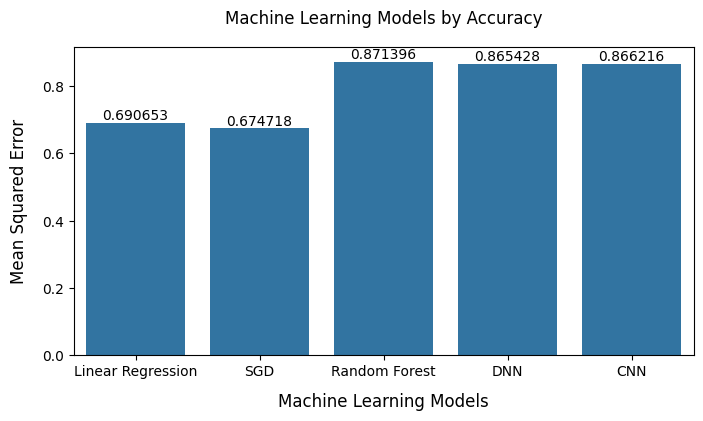

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (8,4))
ax = sns.barplot(x = names,y = values)
ax.bar_label(ax.containers[0])
plt.xlabel("Machine Learning Models",size = 12,labelpad = 10)
plt.ylabel("Mean Squared Error",size = 12,labelpad=10)
plt.title("Machine Learning Models by Accuracy",size = 12,y = 1.05)
plt.show()